Model Training

Import Data and Required Packages

In [43]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
# Modelling
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, Ridge,Lasso
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import RandomizedSearchCV
from catboost import CatBoostRegressor
from xgboost import XGBRegressor
import warnings


In [3]:
df = pd.read_csv('Student_data.csv')

In [4]:
df.head(5)

,1st,2nd,3rd,4th,5th,College Code,Gender,Roll,Roll no.,Subject Code
0,8.11,7.68,7.11,7.43,8.18,115,Female,NaN,17020.0,16
1,6.48,5.90,4.15,4.29,4.96,115,Male,NaN,17021.0,16
2,8.41,8.24,7.52,8.25,7.75,115,Female,NaN,17022.0,16
3,7.33,6.83,6.33,6.79,6.89,115,Male,NaN,17023.0,16
4,7.89,7.34,7.22,7.32,7.46,115,Male,NaN,17024.0,16


In [7]:
df.isna().sum()

1st               2
2nd               4
3rd               2
4th               5
5th               6
College Code      0
Gender            1
Roll             46
Roll no.        132
Subject Code      0
dtype: int64

In [109]:
df.drop(columns=['Roll','Roll no.'],inplace=True)

In [112]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   1st           176 non-null    float64
 1   2nd           174 non-null    float64
 2   3rd           176 non-null    float64
 3   4th           173 non-null    float64
 4   5th           172 non-null    float64
 5   College Code  178 non-null    int64  
 6   Gender        177 non-null    object 
 7   Subject Code  178 non-null    int64  
dtypes: float64(5), int64(2), object(1)
memory usage: 11.2+ KB


In [143]:
df.isna().sum()

1st             2
2nd             4
3rd             2
4th             5
5th             6
College Code    0
Gender          1
Subject Code    0
dtype: int64

In [167]:
df['1st'].mean()

7.038863636363637

In [168]:
df['Gender'].fillna(0,inplace=True)                 # Replacing Null values from 0 


df['1st'].fillna(df['1st'].mean(),inplace = True)        # Replacing Null values from 0  
df['2nd'].fillna(df['2nd'].mean(),inplace=True)        # Replacing Null values from 0  
df['3rd'].fillna(df['3rd'].mean(),inplace=True)        # Replacing Null values from 0  
df['4th'].fillna(df['4th'].mean(),inplace=True)        # Replacing Null values from 0  
df['5th'].fillna(df['5th'].mean(),inplace=True)        # Replacing Null values from 0  

In [169]:
df.isnull().sum()

1st             0
2nd             0
3rd             0
4th             0
5th             0
College Code    0
Gender          0
Subject Code    0
dtype: int64

Preparing X and Y variables

In [250]:
df1 = df[['1st','2nd', '3rd', '4th','5th']] 


In [251]:
df1

,1st,2nd,3rd,4th,5th
0,8.11,7.68,7.11,7.43,8.18
1,6.48,5.90,4.15,4.29,4.96
2,8.41,8.24,7.52,8.25,7.75
3,7.33,6.83,6.33,6.79,6.89
4,7.89,7.34,7.22,7.32,7.46
...,...,...,...,...,...
173,7.48,7.55,7.67,7.39,8.65
174,7.30,6.41,6.59,7.11,7.38
175,6.30,6.28,5.89,5.71,6.50
176,7.04,7.10,6.81,7.00,6.92


In [257]:
# separate dataset into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)
X_train.shape, X_test.shape

((142, 4), (36, 4))

In [258]:
X = df1[['1st','2nd','3rd','4th']] 
y = df1['5th']  

X_train, X_test, y_train, y_test = train_test_split(X , y, test_size=1/3, random_state=21)


In [259]:
X

,1st,2nd,3rd,4th
0,8.11,7.68,7.11,7.43
1,6.48,5.90,4.15,4.29
2,8.41,8.24,7.52,8.25
3,7.33,6.83,6.33,6.79
4,7.89,7.34,7.22,7.32
...,...,...,...,...
173,7.48,7.55,7.67,7.39
174,7.30,6.41,6.59,7.11
175,6.30,6.28,5.89,5.71
176,7.04,7.10,6.81,7.00


In [261]:
y

0      8.18
1      4.96
2      7.75
3      6.89
4      7.46
       ... 
173    8.65
174    7.38
175    6.50
176    6.92
177    7.00
Name: 5th, Length: 178, dtype: float64

Create an Evaluate Function to give all metrics after model Trainin

In [262]:
def evaluate_model(true, predicted):
    mae = mean_absolute_error(true, predicted)
    mse = mean_squared_error(true, predicted)
    rmse = np.sqrt(mean_squared_error(true, predicted))
    r2_square = r2_score(true, predicted)
    return mae, rmse, r2_square

In [263]:
models = {
    "Linear Regression": LinearRegression(),
    "Lasso": Lasso(),
    "Ridge": Ridge(),
    "K-Neighbors Regressor": KNeighborsRegressor(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest Regressor": RandomForestRegressor(),
    "XGBRegressor": XGBRegressor(), 
    "CatBoosting Regressor": CatBoostRegressor(verbose=False),
    "AdaBoost Regressor": AdaBoostRegressor()
}
model_list = []
r2_list =[]

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train, y_train) # Train model

    # Make predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    # Evaluate Train and Test dataset
    model_train_mae , model_train_rmse, model_train_r2 = evaluate_model(y_train, y_train_pred)

    model_test_mae , model_test_rmse, model_test_r2 = evaluate_model(y_test, y_test_pred)

    
    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])
    
    print('Model performance for Training set')
    print("- Root Mean Squared Error: {:.4f}".format(model_train_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_train_mae))
    print("- R2 Score: {:.4f}".format(model_train_r2))

    print('----------------------------------')
    
    print('Model performance for Test set')
    print("- Root Mean Squared Error: {:.4f}".format(model_test_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_test_mae))
    print("- R2 Score: {:.4f}".format(model_test_r2))
    r2_list.append(model_test_r2)
    
    print('='*27)
    print('\n')

Linear Regression
Model performance for Training set
- Root Mean Squared Error: 0.5741
- Mean Absolute Error: 0.4262
- R2 Score: 0.7202
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 0.5083
- Mean Absolute Error: 0.4039
- R2 Score: 0.7243


Lasso
Model performance for Training set
- Root Mean Squared Error: 1.0855
- Mean Absolute Error: 0.8704
- R2 Score: 0.0000
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 0.9694
- Mean Absolute Error: 0.7716
- R2 Score: -0.0028


Ridge
Model performance for Training set
- Root Mean Squared Error: 0.5742
- Mean Absolute Error: 0.4264
- R2 Score: 0.7202
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 0.5091
- Mean Absolute Error: 0.4048
- R2 Score: 0.7234


K-Neighbors Regressor
Model performance for Training set
- Root Mean Squared Error: 0.5428
- Mean Absolute Error: 0.3887
- R2 Score: 0.7499
----------------------

Results

In [264]:
pd.DataFrame(list(zip(model_list, r2_list)), columns=['Model Name', 'R2_Score']).sort_values(by=["R2_Score"],ascending=False)

,Model Name,R2_Score
0,Linear Regression,0.724313
2,Ridge,0.723384
7,CatBoosting Regressor,0.722935
5,Random Forest Regressor,0.709730
3,K-Neighbors Regressor,0.685240
8,AdaBoost Regressor,0.681721
6,XGBRegressor,0.623452
4,Decision Tree,0.559303
1,Lasso,-0.002798



Linear Regression

In [266]:
import sklearn.linear_model as skl_lm
regr = skl_lm.LinearRegression()
regr.fit(X_train,y_train)

round( (regr.score(X_test,y_test)*100) , 2   )

72.43


Difference between Actual and Predicted Values

In [267]:
y_pred = regr.predict(X_test)
difference = y_test - y_pred
dif = round(difference, 2)   
df3 = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred, 'Difference': dif})
df3.head()

,Actual,Predicted,Difference
13,7.00,7.148605,-0.15
113,8.21,7.635667,0.57
21,8.93,8.745476,0.18
143,8.38,8.904392,-0.52
173,8.65,8.048572,0.60



Plot y_train and y_test

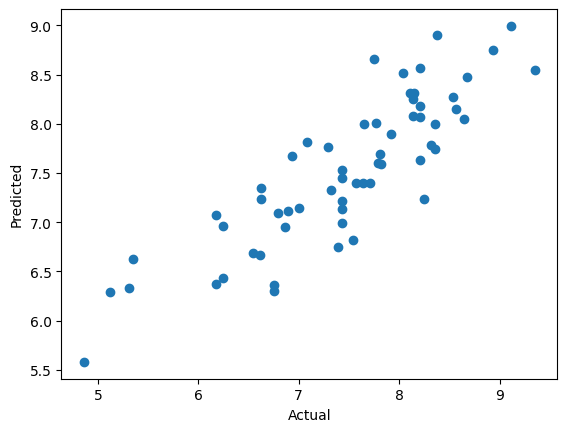

In [268]:
plt.scatter(y_test,y_pred);
plt.xlabel('Actual');
plt.ylabel('Predicted');

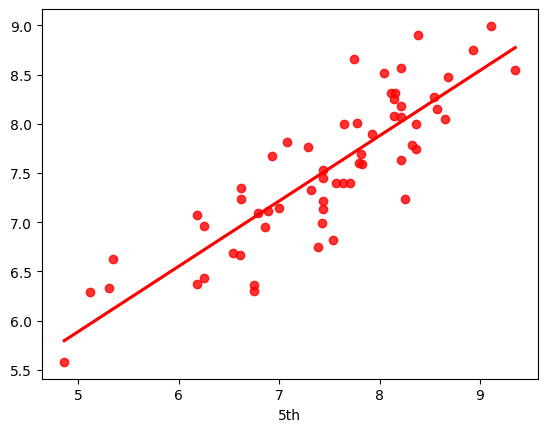

In [269]:
sns.regplot(x=y_test,y=y_pred,ci=None,color ='red'); 